1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 

a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

b)	Is there any evidence that the players overall rating is greater than 80?

c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

Note: 
1) Perform all the Statistical analysis with 5%(Significance level). 
2) Perform the test of normality and test of variance in the appropriate places.

2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed. 

a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.
b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.
c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.
d)	Perform statistical tests to identify the relation between item and duration. Detailed 
explanation of relation between the classes is required.
e)	Perform statistical tests to identify the relation between network and network_type. 
Note: 
1) Perform all the Statistical analysis with 5%(Significance level). 
2) Perform the test of normality and test of variance in the appropriate places.

In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display all columns of the dataframe
pd.options.display.max_columns = None

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats as st
from scipy.stats import randint

# import statistics to perform statistical computations
import statistics
import random
# to test the normality 
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import kruskal
# import a library to perform Z-test
from statsmodels.stats import weightstats as stests


# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
import scikit_posthocs

In [2]:
df=pd.read_csv('fifa_stats.csv')
df.head(5)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [3]:
df.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

#### Q1a) central limit theorem with sample size of 200 for Age
     Find the standard error and the mean of sampling distribution.
     Compare the results with population mean and standard deviation  

In [4]:
# Getting the sample
sample=random.sample(population=list(df['Age']),k=200)

In [5]:
n=200
xbar=np.mean(sample)  # sample mean
mu=df['Age'].mean()   # pop mean
sigma=df['Age'].std()  # pop std
std_error= sigma/(np.sqrt(n))
print('Mean of the sample ',xbar)
print('Standard error of the sample ',std_error)
print('Popltn mean',mu)
print('Popltn stand devtn ',sigma)

Mean of the sample  27.825
Standard error of the sample  0.2728768396819654
Popltn mean 27.2315
Popltn stand devtn  3.8590612753574423


The Standard error describes how precise the mean of the sample is as an estimate of the true mean of the population. When sample size increases the std error decreases since the sample size is nearing the population size and the chance of errror will decrease.

##### b)	Is there any evidence that the players overall rating is greater than 80?

In [6]:
# H1 : mu>80 ; H0 : mu<=80
# checking the normality
samp_over_rating=random.sample(population=list(df['Overall_rating']),k=200)
stat,p_value=shapiro(samp_over_rating)
print('p value of shapiro : ',p_value)

p value of shapiro :  1.1621931546204178e-14


 Since p value is less than 0.05 the data is not normal. So conduct non parametric test.

In [7]:
# H0 : pop median <= 80
# H1 : pop median > 80 #right tail
samp_median=np.median(samp_over_rating)
diff=samp_over_rating-samp_median
stats.wilcoxon(diff,alternative='greater')

WilcoxonResult(statistic=8959.0, pvalue=0.0001384041212083532)

Since p value<0.05, we can reject the null hypothesis.

##### c)Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [8]:
### Create a sample dataframe to analyse;
df_sample=df.sample(n=200)
df_sample.head(10)   # without replacement

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
1359,D. Chygrynskyi,31,Ukraine,76,76,AEK Athens,Right,2,3,2,Medium/ Medium,LCB,19,6.166667,187
1292,M. Destro,27,Italy,76,76,Bologna,Right,2,3,4,Medium/ Low,ST,22,5.083333,159
346,C. Bacca,31,Colombia,81,81,Villarreal CF,Right,3,2,3,Medium/ Low,LS,7,5.083333,170
442,K. Demirbay,24,Germany,80,84,TSG 1899 Hoffenheim,Left,2,4,4,Medium/ Medium,RCM,10,6.000000,159
1363,DÃªnildo Stein,30,Brazil,76,76,Cruzeiro,Left,1,3,3,High/ Medium,ST,11,5.083333,157
475,L. Digne,24,France,80,84,Everton,Left,2,3,4,High/ Medium,LB,12,5.083333,163
363,Vitolo,28,Spain,81,81,AtlÃ©tico Madrid,Right,2,4,3,High/ High,LM,23,6.083333,174
553,Fernando Torres,34,Spain,80,80,Sagan Tosu,Right,3,4,3,Medium/ Medium,LS,9,6.083333,174
1714,Y. Ayoub,24,Morocco,75,79,Feyenoord,Left,1,3,3,Medium/ Medium,CM,18,5.750000,154
773,Bastos,26,Angola,78,79,Lazio,Right,2,3,2,Medium/ High,CB,15,5.083333,170


In [9]:
## mu1: Potential of left.
## mu2: Potential of right
## H0: mu1=mu2 ; H1: mu1!=mu2
left=df_sample[(df_sample['Preferred Foot']=='Left')]['Potential']
right=df_sample[(df_sample['Preferred Foot']=='Right')]['Potential']

In [10]:
# conduct a two sample independent test
# assumption checking
stat_shap, p_value_shap = shapiro(df_sample['Potential'])
stat_lev, p_value_lev = stats.levene(left,right)
print('p value of shapiro ',p_value_shap)
print('p value of levene ',p_value_lev)

p value of shapiro  1.141757252298703e-06
p value of levene  0.5632865793685273


 Since p value is less than 0.05 the data is not normal. So conduct non parametric test.

In [11]:
# H0: pop_med_left = pop_med_right
# H1: pop_med_left != pop_med_right
stats.mannwhitneyu(left,right)

MannwhitneyuResult(statistic=3432.0, pvalue=0.26809028543498825)

<AxesSubplot:xlabel='Preferred Foot', ylabel='Potential'>

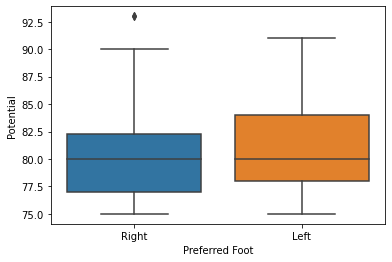

In [12]:
sns.boxplot(data=df_sample,x='Preferred Foot',y='Potential')

From the box plot both the IQR's are almost same and the preferred foot does not have any impact on potential.

##### d)	Perform the statistical test to identify the relation between the overall rating and potential. 
[Assume both are continuous data points].

In [13]:
df_sample.head(3)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
1359,D. Chygrynskyi,31,Ukraine,76,76,AEK Athens,Right,2,3,2,Medium/ Medium,LCB,19,6.166667,187
1292,M. Destro,27,Italy,76,76,Bologna,Right,2,3,4,Medium/ Low,ST,22,5.083333,159
346,C. Bacca,31,Colombia,81,81,Villarreal CF,Right,3,2,3,Medium/ Low,LS,7,5.083333,170


In [14]:
stat_pot, p_value_pot = shapiro(df_sample['Potential'])
stat_or, p_value_or = shapiro(df_sample['Overall_rating'])
print('p value for potential : ',p_value_pot)
print('p value for over_rating : ',p_value_or)

p value for potential :  1.141757252298703e-06
p value for over_rating :  5.765904247112541e-12


Since the p val for potential and p val for over_rating is less than 0.05, we reject the null hypothesis and the data is not normal. So conduct non parametric test.

In [15]:
# H0: There is no relationship between Overall_rating and Potential.
# H1: There is a relationship between Overall_rating and Potential.
stats.spearmanr(df_sample['Overall_rating'],df_sample['Potential'])

SpearmanrResult(correlation=0.6505753805038115, pvalue=1.88255745853786e-25)

Since p value<0.05 we reject the null hypothesis. Hence there is a relationship between 
Overall_rating and Potential.

###### e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

In [16]:
df_sample['Skill Moves'].unique()

array([2, 4, 3, 5, 1], dtype=int64)

<AxesSubplot:xlabel='Skill Moves', ylabel='Overall_rating'>

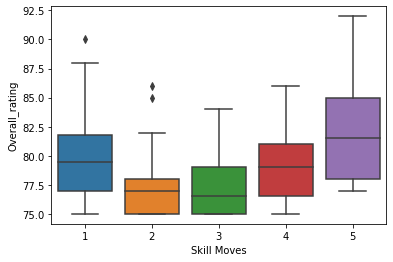

In [17]:
sns.boxplot(data=df_sample,x='Skill Moves',y='Overall_rating')

Interpretation:
* Overall rating is very high when the skill move is 5 
* IQR is very high when the skill move is 5
* Overall rating is almost same when the skill moves are 2,3 and 4.
* Overall rating varies for different skill moves

In [18]:
# H0: There is no difference in overall rating for different skill moves.
#      (Average overall rating is same for different skill moves)
# H1: There is a difference in overall rating for different skill moves.
#     (Average overall rating is different for atleast one of the skill moves)

In [19]:
# shapiro to check normality
stats,p_val=shapiro(df_sample['Overall_rating'])
print('p value of shapiro :',p_val)

p value of shapiro : 5.765904247112541e-12


In [20]:
stat,p_val=levene(df_sample[(df_sample['Skill Moves']==1)]['Overall_rating'],
                       df_sample[(df_sample['Skill Moves']==2)]['Overall_rating'],
                        df_sample[(df_sample['Skill Moves']==3)]['Overall_rating'],
                       df_sample[(df_sample['Skill Moves']==4)]['Overall_rating'],
                       df_sample[(df_sample['Skill Moves']==5)]['Overall_rating'])
print(' p value for levene : ',p_val)

 p value for levene :  0.005162733967049559


In [21]:
# H0: There is no difference in overall rating for different skill moves.
#      (Median value of overall rating is same for different skill moves)
# H1: There is a difference in overall rating for different skill moves.
#     (Median value of overall rating is different for atleast one of the skill moves)

In [22]:
kruskal(df_sample[(df_sample['Skill Moves']==1)]['Overall_rating'],
                             df_sample[(df_sample['Skill Moves']==2)]['Overall_rating'],
                             df_sample[(df_sample['Skill Moves']==3)]['Overall_rating'],
                             df_sample[(df_sample['Skill Moves']==4)]['Overall_rating'],
                             df_sample[(df_sample['Skill Moves']==5)]['Overall_rating'])

KruskalResult(statistic=24.48658721428184, pvalue=6.379713173859063e-05)

Since p value<0.05 we reject the Null hypothesis. Hence there is a difference in overall rating for various skill moves.

In [23]:
df1=pd.read_csv('phone.csv')
df1.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

In [24]:
df1['network'].unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline'], dtype=object)

In [25]:
len(df1)

820

In [26]:
820*0.1

82.0

In [27]:
df1_sample=df1.sample(n=82)
df1_sample.head()

,date,duration,item,month,network,network_type
161,06-11-14 9:47,161.547348,call,2014-11,Vodafone,mobile
297,25-11-14 18:47,208.040123,call,2014-12,voicemail,voicemail
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile
657,29-01-15 17:19,183.513776,sms,2015-02,Vodafone,mobile
135,04-11-14 14:26,184.848910,call,2014-11,voicemail,voicemail


In [28]:
len(df1_sample)

82

In [29]:
df1_sample['network'].unique()

array(['Vodafone', 'voicemail', 'Tesco', 'Meteor', 'data', 'landline',
       'Three'], dtype=object)

In [34]:
# averaage duration call range for different network
# with 95%
xbar=df1_sample['duration'].mean()
sigma=df1['duration'].std()
n=82
den=np.sqrt(n)
error= sigma/den
cv1=st.norm.interval(0.95,loc=xbar,scale=error)
print('Duration call range with 95% confid interval is :',cv1)
cv2=st.norm.interval(0.99,loc=xbar,scale=error)
print('Duration call range with 99% confid interval is :',cv2)

Duration call range with 95% confid interval is : (142.47822552094308, 162.25571609613016)
Duration call range with 99% confid interval is : (139.37095655111546, 165.3629850659578)


In [36]:
xbar=df1_sample['duration'].mean()
xbar


152.36697080853662

*The bandwidth is very high for 99% confidence interval. 99% of the sample mean are hypothesised to be in this region (140.1173338940422, 166.10936240888452)
*95% of the sample mean are hypothesised to be in this region (143.22460286386982, 163.0020934390569)

##### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

The null and alternative hypothesis is:

H0: There is no significant difference between the observed and expected values.
H1: There is a significant difference between the observed and expected values.

In [ ]:
obs=list(df1_sample['network'].value_counts())
exp=len(df1_sample['network'])/len(obs)
expec=[]
for i in range(7):
    expec.append(exp)
chisquare(f_obs=obs,f_exp=expec)

Since p value is less than 0.05, we reject the null hypothesis.
Hence there is a significant difference between the observed and expected values.
therefor they are not equally distributed.

In [ ]:
sns.distplot(x)

In [ ]:
shapiro(x)

In [ ]:
sns.countplot(data=df1,x='network')

##### c) Plot the distribution of duration with respect to each network in the same graph and 
Interpret the results from the graph.

In [ ]:
sns.boxplot(data=df1_sample,x='network',y='duration')

The median value of duration for different network is around 125 to 175
The duration for voice mail is around 175.
Maximum duration is recorded for data and minimum duration is recorded for Vodafone.
IQR is very high for Tesco.

###### d)	Perform statistical tests to identify the relation between item and duration. Detailed 
explanation of relation between the classes is required.

In [ ]:
df1_sample['item'].unique()

In [ ]:
shapiro(df1_sample['duration'])

In [ ]:
stats.levene(df1_sample[(df1_sample['item']=='data')]['duration'],
              df1_sample[(df1_sample['item']=='call')]['duration'],
              df1_sample[(df1_sample['item']=='sms')]['duration'])

Since p value is greater than 0.05, there is a equality of variance

In [ ]:
# H0 : Average duration is same for all the items
# H1 : Average duration is different for atleast for atleast one of the items
stats.f_oneway(df1_sample[(df1_sample['item']=='data')]['duration'],
              df1_sample[(df1_sample['item']=='call')]['duration'],
              df1_sample[(df1_sample['item']=='sms')]['duration'])

Since the p value is greater than 0.05, we fail to reject the null hypothesis.(Accept null)
Hence the Average duration is same for all the items.

###### e)	Perform statistical tests to identify the relation between network and network_type. 

In [ ]:
# H0: Network and Network type are independent 
# H1: Network and Network type are not independent

In [ ]:
df1_sample['network'].unique()

In [ ]:
table=pd.crosstab(df1_sample['network'],df1_sample['network_type'])
obs=table.values
chi2_contingency(observed = obs, correction = False)

Here the p value is 5.302106907806633e-42 which is less than 0.05
Hence we reject the null hypothesis.
Therfeore Network and Network type are dependent on each other